In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df_news = pd.read_csv("./preprocessed_data.csv")
df_news = df_news.drop_duplicates(["title"])
df_news = df_news.dropna()
df_news

,Unnamed: 0,title,date,content,content_corpus
0,0,"데이터센터 전력 40% 차지하는 D램… 삼성·SK하이닉스, ‘전성비’ ...",2023.07.10 15:29,"챗GPT 시대 화두로 떠오른 전력효율성 문제 ”전력 먹는 하마, D램 전력효율성 개...","챗GPT 시대 화두로 떠오른 전력효율성 문제 ”전력 먹는 하마, D램 전력효율성 개..."
1,1,"LS일렉트릭, 텍사스 공장 짓는다…현지 삼성·SK·LG 전력 지원",2023.07.10 15:08,북미 첫 배전시스템 생산거점…생산설비 및 R&D센터 구축 삼성전자 파운드리 공장과 ...,북미 첫 배전시스템 생산거점…생산설비 및 R&D센터 구축 삼성전자 파운드리 공장과 ...
2,2,“삼성전자가 식품도 팔았어?”…신규 가입 일단 종료한 사연,2023.07.10 15:07,삼성 가전제품 구매고객에 삼성닷컴 내 e-식품관에서 할인혜택 주며 ‘락인’ 기대 ...,삼성 가전제품 구매고객에 삼성닷컴 내 e-식품관에서 할인혜택 주며 ‘락인’ 기대 ...
3,3,SGC솔루션 '도어글라스'…삼성·LG 세탁기·건조기에 공급,2023.07.10 15:05,해외 가전 브랜드 공략…B2B 사업 확장[서울=뉴시스] SGC솔루션 논산 공장. (...,해외 가전 브랜드 공략…B2B 사업 확장 SGC솔루션 논산 공장. . 생활유리...
4,4,‘페이커’ 내세운 삼성 OLED 게이밍 모니터 글로벌 3천대 돌파,2023.07.10 14:58,북미·유럽 등 예약 판매 3000대 돌파 10일 오후 6시 삼성닷컴 ‘페이커’ 출연...,북미·유럽 등 예약 판매 3000대 돌파 10일 오후 6시 삼성닷컴 ‘페이커’ 출연...
...,...,...,...,...,...
2029,2029,엔비디아 폭등에…삼성전자·SK하이닉스 동반 강세,2023.05.26 09:25,[서울=뉴시스] 김경택 기자 = 삼성전자와 SK하이닉스가 장 초반 동반 강세다. 간...,삼성전자와 SK하이닉스가 장 초반 동반 강세다. 간밤 미국 증시에서 엔비디아가 폭등...
2030,2030,"""7만전자 영차""…삼성전자, 장초반 1% 이상 올라[특징주]",2023.05.26 09:19,경기 수원 영통구 삼성전자 본사의 모습. 2022.3.28/뉴스1 ⓒ News1 김...,경기 수원 영통구 삼성전자 본사의 모습. News1 코스피 대장주 삼성전자가 개...
2031,2031,"코스피, 외인 순매수 속 강보합…삼전 1%·하이닉스 3% 상승",2023.05.26 09:16,지난 25일 오후 서울 중구 을지로 하나은행 본점 딜링룸. 사진=연합뉴스코스피가 외...,지난 25일 오후 서울 중구 을지로 하나은행 본점 딜링룸. 외국인의 순매수세 속...
2032,2032,삼전·하이닉스 강세에 코스피도 상승 출발…외인 매수세,2023.05.26 09:15,/사진=임종철 디자인기자기관이 증시에서 매도하며 상승폭이 제한되고 있지만 반도체 강...,증시에서 매도하며 상승폭이 제한되고 있지만 반도체 강세가 이어지고 있다. 26...


In [10]:
df_news["content_len"] = df_news['content'].str.len()
df_news["content_corpus_len"] = df_news['content_corpus'].str.len()

,Unnamed: 0,title,date,content,content_corpus,content_len,content_corpus_len
0,0,"데이터센터 전력 40% 차지하는 D램… 삼성·SK하이닉스, ‘전성비’ ...",2023.07.10 15:29,"챗GPT 시대 화두로 떠오른 전력효율성 문제 ”전력 먹는 하마, D램 전력효율성 개...","챗GPT 시대 화두로 떠오른 전력효율성 문제 ”전력 먹는 하마, D램 전력효율성 개...",1813,1651
1,1,"LS일렉트릭, 텍사스 공장 짓는다…현지 삼성·SK·LG 전력 지원",2023.07.10 15:08,북미 첫 배전시스템 생산거점…생산설비 및 R&D센터 구축 삼성전자 파운드리 공장과 ...,북미 첫 배전시스템 생산거점…생산설비 및 R&D센터 구축 삼성전자 파운드리 공장과 ...,870,816
2,2,“삼성전자가 식품도 팔았어?”…신규 가입 일단 종료한 사연,2023.07.10 15:07,삼성 가전제품 구매고객에 삼성닷컴 내 e-식품관에서 할인혜택 주며 ‘락인’ 기대 ...,삼성 가전제품 구매고객에 삼성닷컴 내 e-식품관에서 할인혜택 주며 ‘락인’ 기대 ...,1749,1698
3,3,SGC솔루션 '도어글라스'…삼성·LG 세탁기·건조기에 공급,2023.07.10 15:05,해외 가전 브랜드 공략…B2B 사업 확장[서울=뉴시스] SGC솔루션 논산 공장. (...,해외 가전 브랜드 공략…B2B 사업 확장 SGC솔루션 논산 공장. . 생활유리...,547,476
4,4,‘페이커’ 내세운 삼성 OLED 게이밍 모니터 글로벌 3천대 돌파,2023.07.10 14:58,북미·유럽 등 예약 판매 3000대 돌파 10일 오후 6시 삼성닷컴 ‘페이커’ 출연...,북미·유럽 등 예약 판매 3000대 돌파 10일 오후 6시 삼성닷컴 ‘페이커’ 출연...,1096,1029
...,...,...,...,...,...,...,...
2029,2029,엔비디아 폭등에…삼성전자·SK하이닉스 동반 강세,2023.05.26 09:25,[서울=뉴시스] 김경택 기자 = 삼성전자와 SK하이닉스가 장 초반 동반 강세다. 간...,삼성전자와 SK하이닉스가 장 초반 동반 강세다. 간밤 미국 증시에서 엔비디아가 폭등...,618,572
2030,2030,"""7만전자 영차""…삼성전자, 장초반 1% 이상 올라[특징주]",2023.05.26 09:19,경기 수원 영통구 삼성전자 본사의 모습. 2022.3.28/뉴스1 ⓒ News1 김...,경기 수원 영통구 삼성전자 본사의 모습. News1 코스피 대장주 삼성전자가 개...,521,468
2031,2031,"코스피, 외인 순매수 속 강보합…삼전 1%·하이닉스 3% 상승",2023.05.26 09:16,지난 25일 오후 서울 중구 을지로 하나은행 본점 딜링룸. 사진=연합뉴스코스피가 외...,지난 25일 오후 서울 중구 을지로 하나은행 본점 딜링룸. 외국인의 순매수세 속...,1021,928
2032,2032,삼전·하이닉스 강세에 코스피도 상승 출발…외인 매수세,2023.05.26 09:15,/사진=임종철 디자인기자기관이 증시에서 매도하며 상승폭이 제한되고 있지만 반도체 강...,증시에서 매도하며 상승폭이 제한되고 있지만 반도체 강세가 이어지고 있다. 26...,1127,1058


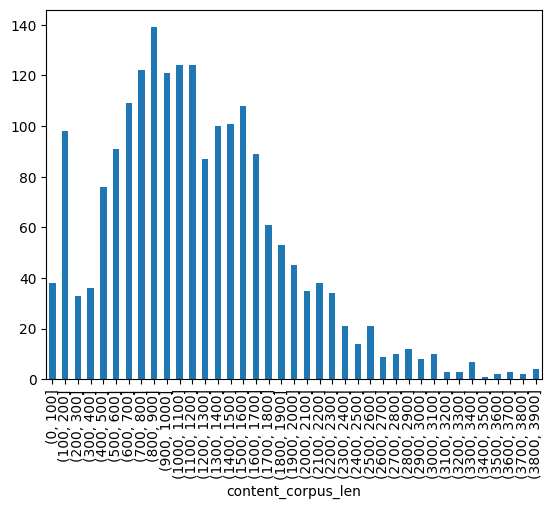

In [28]:
grouped = df_news.groupby(pd.cut(df_news['content_corpus_len'], bins=range(0, 4000, 100))).size()
grouped.plot(kind='bar')
plt.show()

In [29]:
df_news[df_news["content_corpus_len"] > 2000].to_csv("./over_2000.csv")